# Уравнения

In [ ]:
# - d * D^2 * sin(2x) * (T * tan(x) * (1 + sqrt(s) + s) / (g - 1) / B / L / (1 + sqrt(s)) - (1 + sqrt(s) - d * sqrt(s))) / 8 / g / (1 + s) / A

$$W_n = \frac{\delta_{kn} L_{sn} D^2 (\gamma - 1) B cos^2x_n}{4 \gamma} \left(\frac{\Delta T_{mn} tan(x_n)}{B L_{sn} (\gamma - 1) (1 + \sqrt{\sigma}) \Lambda} - 1\right) - \frac{ \delta_{kn} L_{sn} D^2 \sqrt{\sigma} sin^2x_n}{4 \gamma B \Lambda}$$

In [ ]:
    # d * L * D^2 * (g - 1) * B cos^2(x) * (T * tan(x) / B / L / (g-1) / (1 + sqrt(s)) / A - 1) / 4 / g - d * L * D^2 * sqrt(s) * sin^2(x) / 4 / g / B / A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline as spline
import os

# Некоторые полезные функции

In [2]:
def safe_read(filename):
    with open(filename) as f:
        lines = f.readlines()
    with open(filename, 'w') as f:
        for line in lines:
            if line and line[0] != '=':
                f.write(line)


def bin_search(lst, value):
    l = -1
    r = len(lst)
    while r - l > 1:
        m = (r + l) // 2
        if value < lst[m]:
            r = m
        else:
            l = m
    return r


def derivative(x, y):
    df = pd.DataFrame()
    for i in range(1, len(x)):
        temp = {'dy/dx': (y.iloc[i] - y.iloc[i - 1]) / (x.iloc[i] - x.iloc[i - 1]), 'x': x.iloc[i]}
        df = df.append(temp, ignore_index=True)
    return df


def find_a_start(dataframe, acc=0.0001, step=25):
    func_t, func_Th = dataframe['t'], dataframe['Th']
    for i in range(step, len(func_t), step):
        if abs((func_Th.iloc[i] - func_Th.iloc[i - step]) / (func_t.iloc[i] - func_t.iloc[i - step])) <= acc:
            return func_t.iloc[i]

# Калибровка термисторов

In [102]:
def f(x, A, B, C):
    return A + B * np.log(x) + C * (np.log(x)) ** 3


R1 = pd.DataFrame(
    {'T': [25, 40, 45.2, 50.3, 55.2, 61, 65.3, 69.9], 'R': [9650, 5295, 4295, 3540, 2910, 2353, 2012, 1704]})
R2 = pd.DataFrame(
    {'T': [24.8, 40, 45.2, 50.3, 55.2, 61, 65.3, 69.9], 'R': [10398, 5470, 4430, 3650, 3007, 2415, 2075, 1740]})

popt, pcov = curve_fit(f, R2['R'], 1 / (R2['T'] + 273.15))
A, B, C = popt
A, B, C

(0.0013501469618993286, 0.0001959672064136435, 2.4485122916208657e-07)

# Просмотр результатов

C:\Users\timbe\AppData\Local\Temp\ipykernel_30084\3715945471.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  during = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_30084\3715945471.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after = pd.read_csv(filename, sep=', ')


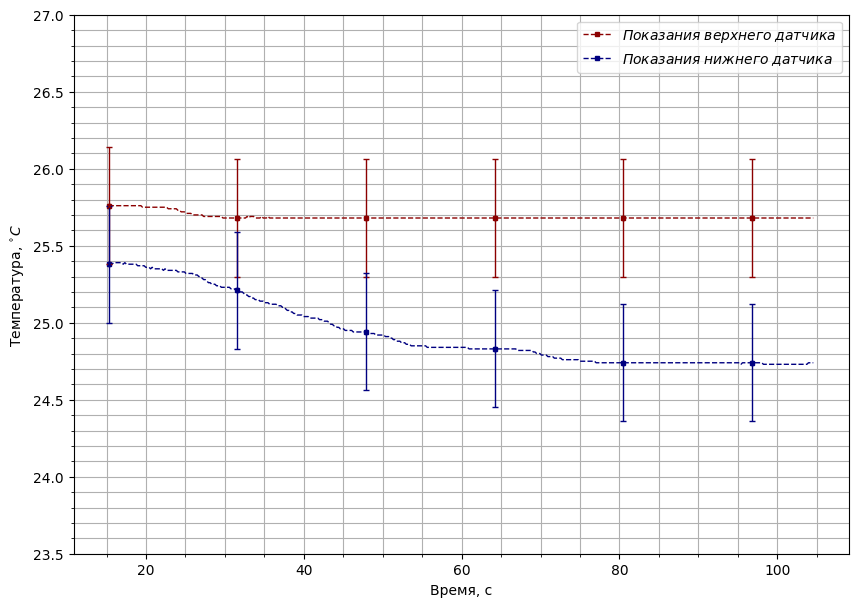

In [78]:
filename = 'tests/length and position/test 30.csv'
during = pd.read_csv(filename, sep=', ')
filename = 'tests/test_332GHz_nr.csv'
after = pd.read_csv(filename, sep=', ')
during = during.dropna()
after = after.dropna()
s = min(find_a_start(during), find_a_start(after))
f = min(during['t'].iloc[-1], after['t'].iloc[-1])
during = during[(s <= during['t']) & (during['t'] <= f)]
after = after[(s <= after['t']) & (after['t'] <= f)]

fig, ax = plt.subplots(figsize=(10, 7))
t, Tc, Th = during['t'] / 1000, during['Tc'], during['Th']
DeltaT = Th - Tc
dT = DeltaT.iloc[0]
# ax.plot(t, Th, 's', c='darkred', ls='-', ms=3, linewidth=1, markevery=80, label=r'$Показания\;верхнего\;датчика$')
# ax.plot(t, Tc, 's', c='navy', ls='-', ms=3, linewidth=1, markevery=80, label=r'$Показания\;нижнего\;датчика$')
# ax.errorbar(t, Th, dT, 0, marker='s', c='darkred', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
# ax.errorbar(t, Tc, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax.grid(which="both")
ax.minorticks_on()

ax.set_ylabel('Температура, $^{\circ}C$')
ax.set_xlabel('Время, с')
ax.set_ylim(23.5, 27)
t, Tc, Th = after['t'] / 1000, after['Tc'], after['Th']
DeltaT = Th - Tc
dT = DeltaT.iloc[0]
ax.plot(t, Th, 's', c='darkred', ls='--', ms=3, linewidth=1, markevery=80, label=r'$Показания\;верхнего\;датчика$')
ax.plot(t, Tc, 's', c='navy', ls='--', ms=3, linewidth=1, markevery=80, label=r'$Показания\;нижнего\;датчика$')
ax.errorbar(t, Th, dT, 0, marker='s', c='darkred', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax.errorbar(t, Tc, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax.legend()

In [57]:
filename = 'tests/length and position/test 30.csv'
with open(filename) as f:
    lines = f.readlines()
with open(filename, 'w') as f:
    for line in lines:
        if line and line[0] != '=':
            f.write(line)
during = pd.read_csv(filename, sep=', ')

filename = 'tests/test_332GHz_nr.csv'
with open(filename) as f:
    lines = f.readlines()
with open(filename, 'w') as f:
    for line in lines:
        if line and line[0] != '=':
            f.write(line)
after = pd.read_csv(filename, sep=', ')

during = during.dropna()
after = after.dropna()
s = min(find_a_start(during), find_a_start(after))
f = min(during['t'].iloc[-1], after['t'].iloc[-1])
during = during[(s <= during['t']) & (during['t'] <= f)]
after = after[(s <= after['t']) & (after['t'] <= f)]

C:\Users\timbe\AppData\Local\Temp\ipykernel_30084\3075345238.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  during = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_30084\3075345238.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after = pd.read_csv(filename, sep=', ')


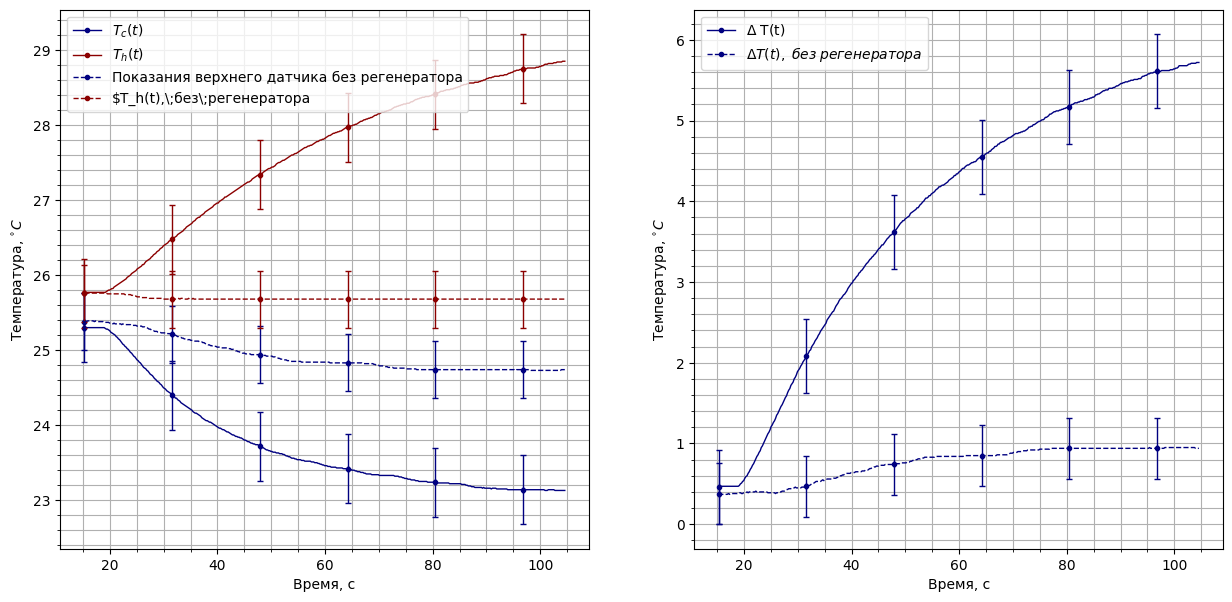

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].set_ylabel('Temperature, $^{\circ}C$')
t, Tc, Th = during['t'] / 1000, during['Tc'], during['Th']
DeltaT = Th - Tc
dT = DeltaT.iloc[0]
ax[0].plot(t, Tc, 'o', c='navy', ls='-', ms=3, linewidth=1, markevery=80, label=r'$T_c(t)$')
ax[0].errorbar(t, Tc, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[0].plot(t, Th, 'o', c='darkred', ls='-', ms=3, linewidth=1, markevery=80, label=r'$T_h(t)$')
ax[0].errorbar(t, Th, dT, 0, marker='s', c='darkred', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[0].grid(which="both")
ax[0].minorticks_on()
ax[0].legend()

ax[1].plot(t, DeltaT, 'o', c='navy', ls='-', ms=3, linewidth=1, markevery=80, label=r'$\Delta$ T(t)')
ax[1].errorbar(t, DeltaT, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[1].grid(which="both")
ax[1].minorticks_on()
ax[1].legend()

ax[0].set_ylabel('Температура, $^{\circ}C$')
ax[0].set_xlabel('Время, с')
t, Tc, Th = after['t'] / 1000, after['Tc'], after['Th']
DeltaT = Th - Tc
dT = DeltaT.iloc[0]
ax[0].plot(t, Tc, 'o', c='navy', ls='--', ms=3, linewidth=1, markevery=80,
           label='Показания верхнего датчика без регенератора')
ax[0].errorbar(t, Tc, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[0].plot(t, Th, 'o', c='darkred', ls='--', ms=3, linewidth=1, markevery=80, label=r'$T_h(t),\;без\;регенератора')
ax[0].errorbar(t, Th, dT, 0, marker='s', c='darkred', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[0].minorticks_on()
ax[0].legend()

ax[1].set_ylabel('Температура, $^{\circ}C$')
ax[1].set_xlabel('Время, с')
ax[1].plot(t, DeltaT, 'o', c='navy', ls='--', ms=3, linewidth=1, markevery=80,
           label=r'$\Delta T(t),\;без\;регенератора$')
ax[1].errorbar(t, DeltaT, dT, 0, marker='s', c='navy', ls='', ms=1, lw=1, markevery=80, errorevery=80, capsize=2)
ax[1].minorticks_on()
ax[1].legend()

# Зависимость от частоты колебаний

In [4]:
tabelOfFreq = pd.DataFrame()
exp_time = 90

for i in range(300, 600):
    filename = f'tests/frequency/test_{i}GHz.csv'
    if os.path.exists(filename):
        safe_read(filename)
        df = pd.read_csv(filename, sep=', ')
        df = df.dropna()
        df = df[(find_a_start(df) < df['t']) & (df['t'] < find_a_start(df) + 1000 * exp_time)]

        t, Th, Tc = df['t'], df['Th'], df['Tc']
        DeltaT = Th - Tc
        temp = {'dt': (df.iloc[-1, 0] - df.iloc[0, 0]) / 1000, 'f': i, 'dT': DeltaT.iloc[-1] - DeltaT.iloc[0]}
        tabelOfFreq = tabelOfFreq.append(temp, ignore_index=True)
tabelOfFreq

C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\3172674406.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\3172674406.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfFreq = tabelOfFreq.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\3172674406.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760

,dt,f,dT
0,89.688,300.0,1.37
1,89.683,325.0,2.87
2,89.687,327.0,4.68
3,89.684,329.0,4.37
4,89.686,330.0,5.24
5,89.684,332.0,5.58
6,89.683,335.0,2.71
7,89.683,340.0,3.98
8,89.687,350.0,1.54
9,89.684,365.0,0.57


C:\Users\timbe\PycharmProjects\1proj1\venv\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


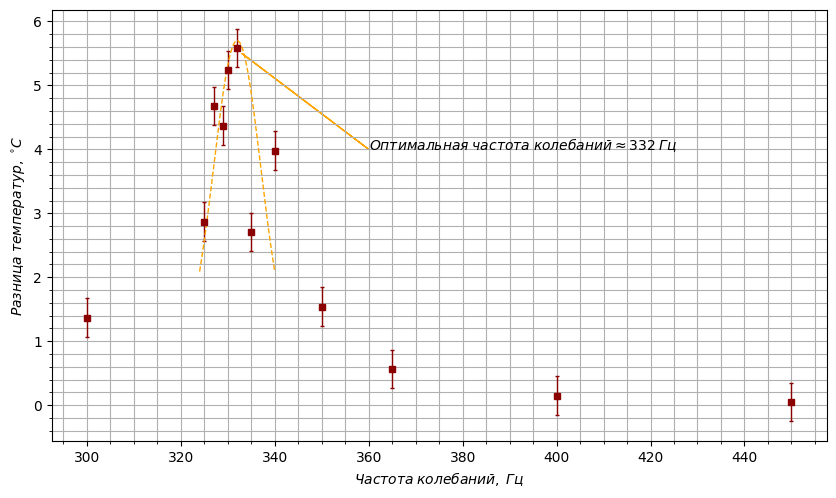

In [10]:
def appr(x, a, b, c, d):
    return a + b * np.exp(-c * (x - d) ** 2)


# tabelOfFreq = tabelOfFreq.iloc[1:-2]
popt, pcov = curve_fit(appr, tabelOfFreq['f'], tabelOfFreq['dT'])
x = np.linspace(324, 340, 300)
y = appr(x, 0.7, 5, 0.02, 332)

fig, ax = plt.subplots(figsize=(10, 5.6))
ax.set_ylabel(r'$Разница\;температур,\;^{\circ}C$')
ax.set_xlabel(r'$Частота\;колебаний,\;Гц$')
ax.grid(which='both')
ax.minorticks_on()
ax.text(360, 4, r'$Оптимальная\;частота\;колебаний\approx332\;Гц$')
ax.arrow(360, 4, -27, 1.5, shape='left', color='orange', lw=1)
ax.errorbar(tabelOfFreq['f'], tabelOfFreq['dT'], 0.3, 0, marker='s', ms=4, ls='', lw=1, capsize=1.5, c='darkred')
ax.plot(x, y, ls='--', lw=1, c='orange')

C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\1573944670.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\1573944670.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfRegen = tabelOfRegen.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\1573944670.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_207

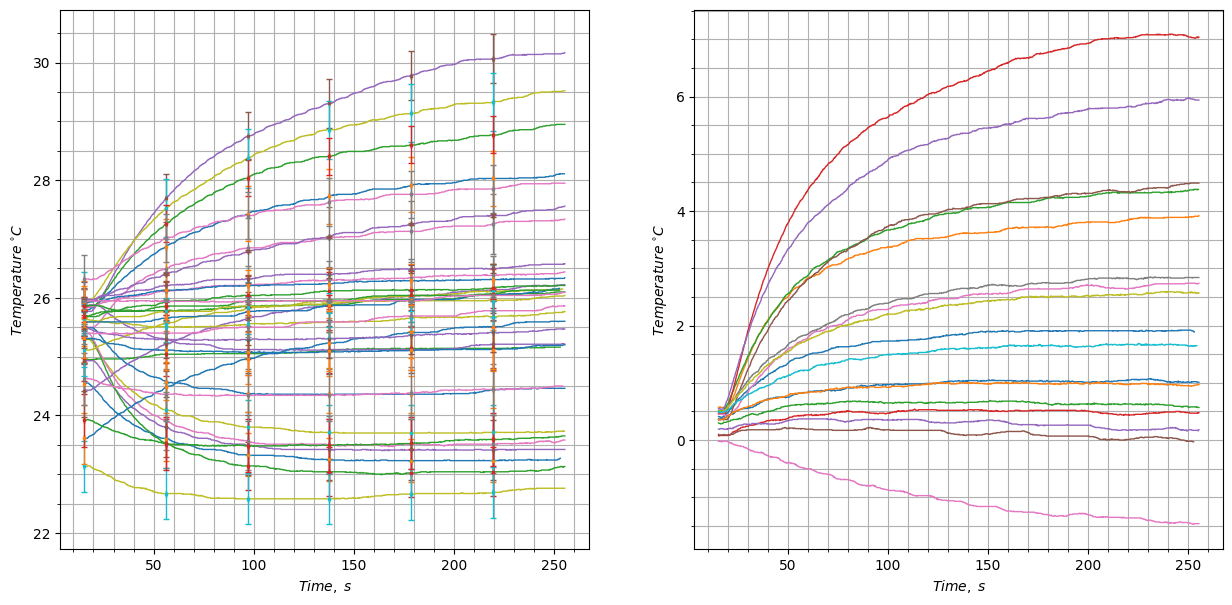

,dt,x,DeltaT,dT
0,237.493,0.0,1.48,0.369
1,239.735,10.0,3.35,0.513
2,239.526,20.0,3.86,0.468
3,239.740,30.0,6.58,0.414
4,239.741,40.0,5.39,0.495
5,239.741,50.0,4.14,0.315
6,239.746,60.0,2.29,0.405
7,239.730,70.0,2.36,0.432
8,239.730,80.0,2.07,0.450
9,238.710,90.0,1.16,0.441


In [8]:
tabelOfRegen = pd.DataFrame()
exp_time = 240
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i in range(0, 400, 5):
    filename = f'tests/length and position/test {i}.csv'
    if os.path.exists(filename):
        safe_read(filename)
        df = pd.read_csv(filename, sep=', ')
        df = df.dropna()
        s = find_a_start(df)
        df = df[(s < df['t']) & (df['t'] < s + 1000 * exp_time)]
        t, Th, Tc = df['t'], df['Th'], df['Tc']
        DeltaT = Th - Tc
        dT = abs(0.9 * DeltaT.iloc[0])
        ax[0].set_ylabel(r'$Temperature\;^{\circ}C$')
        ax[1].set_ylabel(r'$Temperature\;^{\circ}C$')
        ax[0].set_xlabel(r'$Time,\;s$')
        ax[1].set_xlabel(r'$Time,\;s$')
        ax[0].grid(which='both')
        ax[1].grid(which='both')
        ax[0].minorticks_on()
        ax[1].minorticks_on()
        ax[0].plot(t / 1000, Tc, '-', linewidth=1, label=f'Cold side {i} mm')
        ax[0].errorbar(t / 1000, Tc, dT, 0, ls='', marker='s', markevery=200, errorevery=200, lw=1, capsize=2, ms=2)
        ax[0].plot(t / 1000, Th, '-', linewidth=1, label=f'Hot side {i} mm')
        ax[0].errorbar(t / 1000, Th, dT, 0, ls='', marker='s', markevery=200, errorevery=200, lw=1, capsize=2, ms=2)
        ax[1].plot(t / 1000, DeltaT, '-', linewidth=1, label=f'{i} mm')
        temp = {'dt': (df.iloc[-1, 0] - df.iloc[0, 0]) / 1000, 'x': i,
                'DeltaT': DeltaT.iloc[-1] - DeltaT.iloc[0], 'dT': dT}
        tabelOfRegen = tabelOfRegen.append(temp, ignore_index=True)
# ax[0].legend()
# ax[1].legend()
plt.show()
tabelOfRegen

<ErrorbarContainer object of 3 artists>

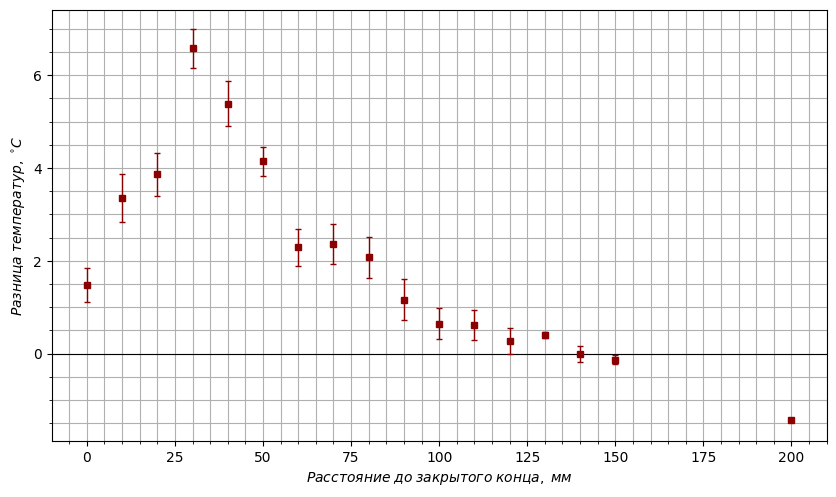

In [14]:
def f(x, a, b, c, d):
    return a + b * np.sin(c * x + d)


# popt, pcov = curve_fit(f, tabelOfRegen['x'], tabelOfRegen['DeltaT'], method='trf')
# f = spline(tabelOfRegen['x'], tabelOfRegen['DeltaT'])
x = np.linspace(-10, 210, 300)

y = f(x, 1, 6, 0.03, 0)

fig, ax = plt.subplots(figsize=(10, 5.6))
ax.set_xlim(-10, 210)
ax.set_ylabel(r'$Разница\;температур,\;^{\circ}C$')
ax.set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax.grid(which='both')
ax.minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax.plot(x, [0] * len(x), '-', lw=0.8, c='black')
ax.errorbar(tabelOfRegen['x'], tabelOfRegen['DeltaT'], tabelOfRegen['dT'], 0, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)
# ax.plot(x, y, '-', c='darkorange', lw=1)

C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\2364966058.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfPress = tabelOfPress.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\2364966058.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfPress = tabelOfPress.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\2364966058.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfPress = tabelOfPress.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\2364966058.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfPress

,x,I,dI
0,75.0,57.156359,11.680083
1,80.0,51.150000,11.197771
2,85.0,59.482274,11.217768
3,90.0,39.748637,11.149469
4,95.0,42.000967,11.014531
5,100.0,41.697114,10.589862
6,105.0,42.917851,11.079283
7,110.0,44.493107,11.466633
8,115.0,37.162839,10.902854
9,120.0,34.987765,10.241224


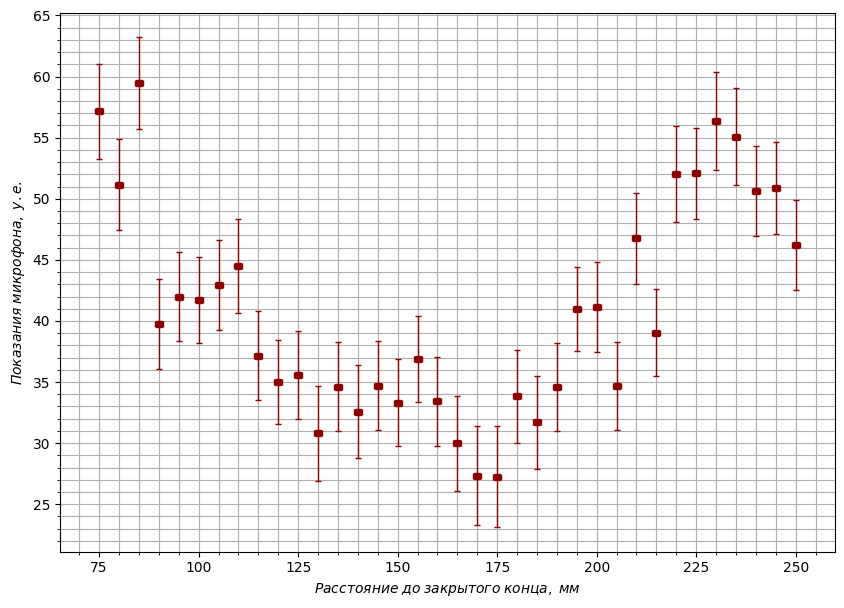

In [31]:
tabelOfPress = pd.DataFrame()
for i in range(75, 300, 5):
    filename = f'tests/pressure/test_ns_{i}.csv'
    if os.path.exists(filename):
        safe_read(filename)
        df = pd.read_csv(filename)
        df = df.drop(len(df) - 1)
        temp = {'x': i, 'I': df['I'].mean(), 'dI': (((df['I']) ** 2).mean() - df['I'].mean() ** 2) ** 0.5}
        tabelOfPress = tabelOfPress.append(temp, ignore_index=True)

# fig, ax = plt.subplots()
# ax.errorbar(tabelOfPress['x'], tabelOfPress['I'], 5, 1, ls='', lw=1, capsize=2)

fig, ax = plt.subplots(figsize=(10, 7
                                ))
ax.set_ylabel(r'$Показания\;микрофона,\;у.е.$')
ax.set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax.grid(which='both')
ax.minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax.errorbar(tabelOfPress['x'], tabelOfPress['I'], tabelOfPress['dI']/3, 1, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)
# def f(x, a, b, c, d):
#     return a + b * np.sin(c * x + d)
#
#
# popt, pcov = curve_fit(f, tabelOfPress['x'], tabelOfPress['I'])
# # f = spline(tabelOfRegen['x'], tabelOfRegen['DeltaT'])
# x = np.linspace(70, 255, 300)
#
# y = f(x, *popt)
# ax.plot(x, y)
tabelOfPress

<ErrorbarContainer object of 3 artists>

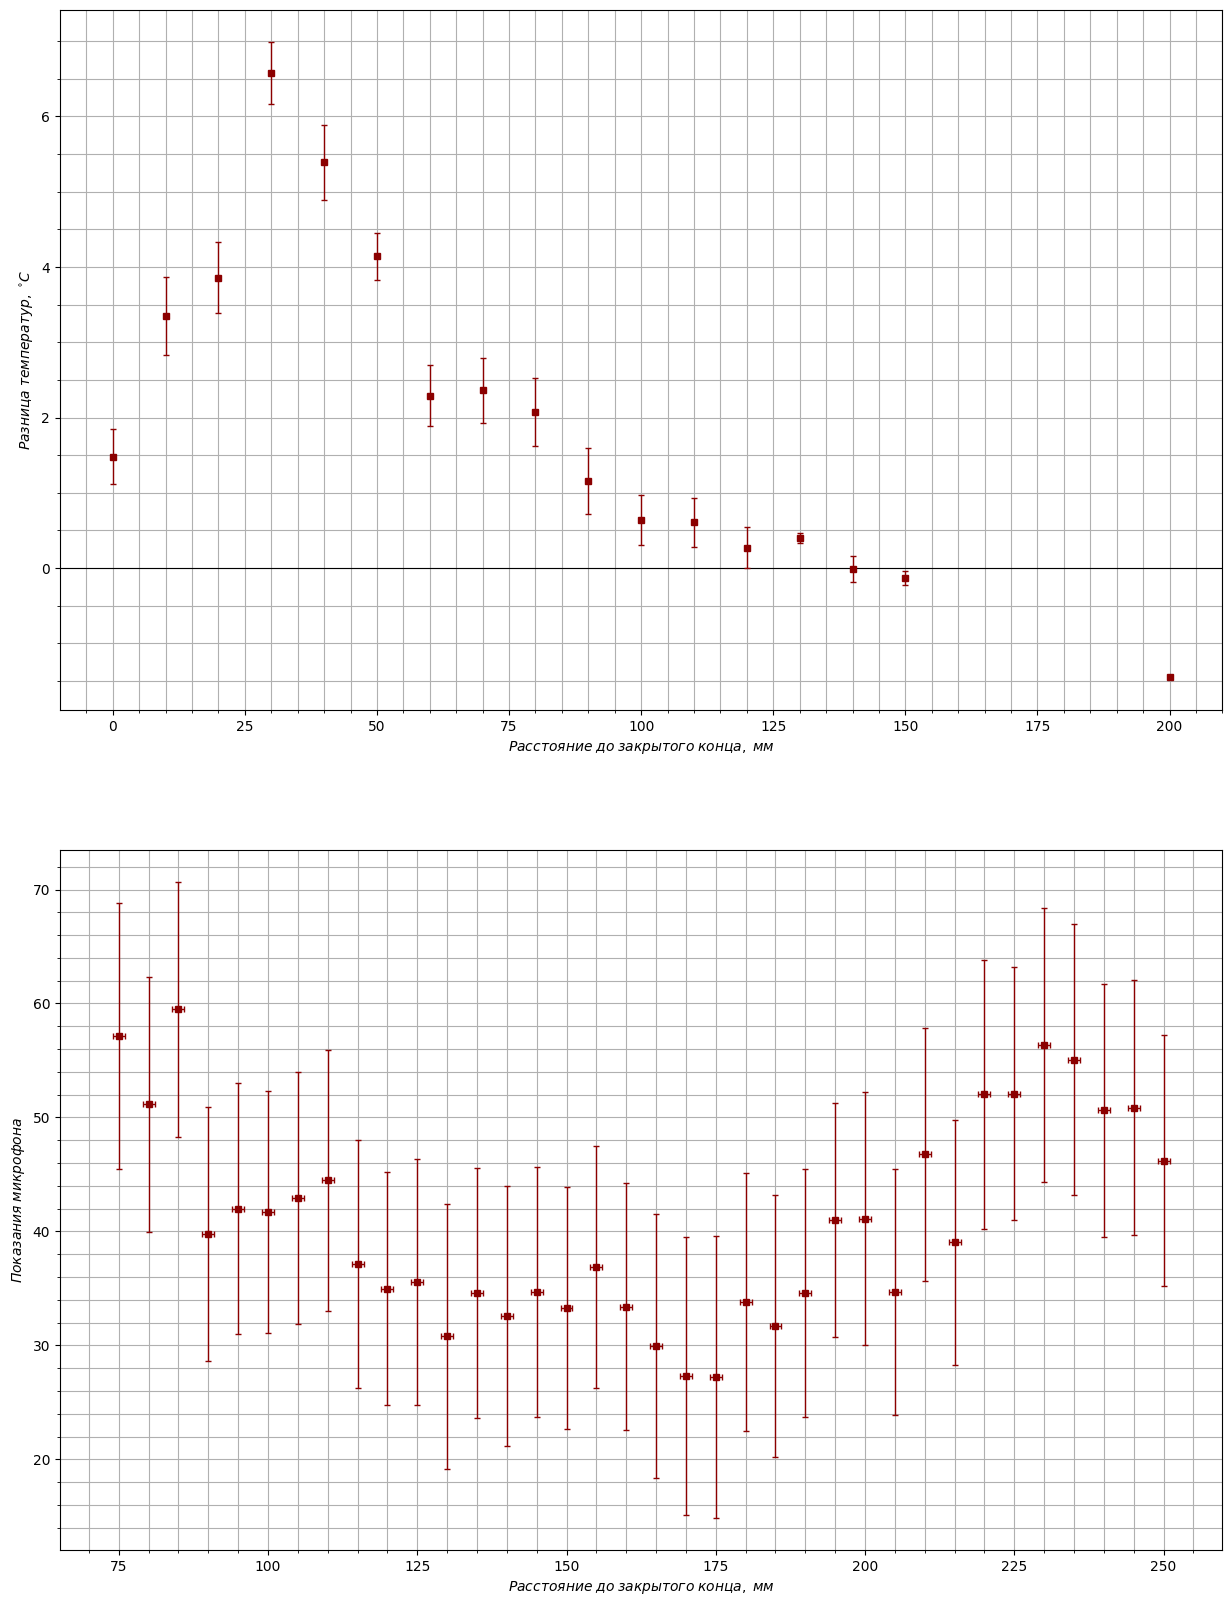

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
ax[0].set_xlim(-10, 210)
ax[0].set_ylabel(r'$Разница\;температур,\;^{\circ}C$')
ax[0].set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax[0].grid(which='both')
ax[0].minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax[0].plot(x, [0] * len(x), '-', lw=0.8, c='black')
ax[0].errorbar(tabelOfRegen['x'], tabelOfRegen['DeltaT'], tabelOfRegen['dT'], 0, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)
ax[1].set_ylabel(r'$Показания\;микрофона$')
ax[1].set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax[1].grid(which='both')
ax[1].minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax[1].errorbar(tabelOfPress['x'], tabelOfPress['I'], tabelOfPress['dI'], 1, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)

<ErrorbarContainer object of 3 artists>

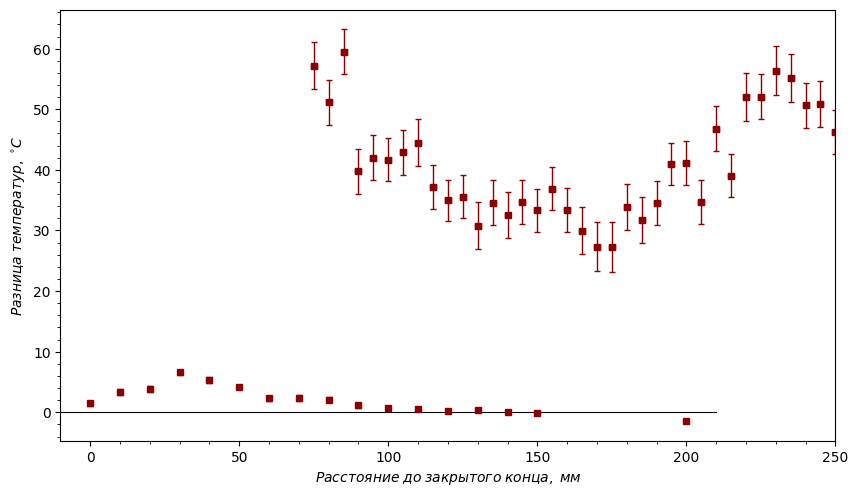

In [34]:

fig, ax = plt.subplots(figsize=(10, 5.6))
ax.set_ylabel(r'$Показания\;микрофона,\;у.е.$')
ax.set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax.grid(which='both')
ax.minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax.errorbar(tabelOfPress['x'], tabelOfPress['I'], tabelOfPress['dI']/3, 1, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)
ax.set_xlim(-10, 250)
ax.set_ylabel(r'$Разница\;температур,\;^{\circ}C$')
ax.set_xlabel(r'$Расстояние\;до\;закрытого\;конца,\;мм$')
ax.grid(which='both')
ax.minorticks_on()
# ax.plot(tabelOfRegen['x'], tabelOfRegen['DeltaT'], '-', c='b')
ax.plot(x, [0] * len(x), '-', lw=0.8, c='black')
ax.errorbar(tabelOfRegen['x'], tabelOfRegen['DeltaT'], tabelOfRegen['dT'], 0, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)

C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\502078574.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\502078574.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabelOfAmp = tabelOfAmp.append(temp, ignore_index=True)
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\502078574.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename, sep=', ')
C:\Users\timbe\AppData\Local\Temp\ipykernel_20760\5020

,dt,Vpp,DeltaT,dT
0,139.839,400.0,0.78,0.711
1,136.372,500.0,1.20,0.738
2,136.168,600.0,1.55,0.729
3,136.372,700.0,1.96,0.711
4,139.836,800.0,2.39,0.657
5,139.836,900.0,2.87,0.648
6,139.836,1000.0,3.30,0.657


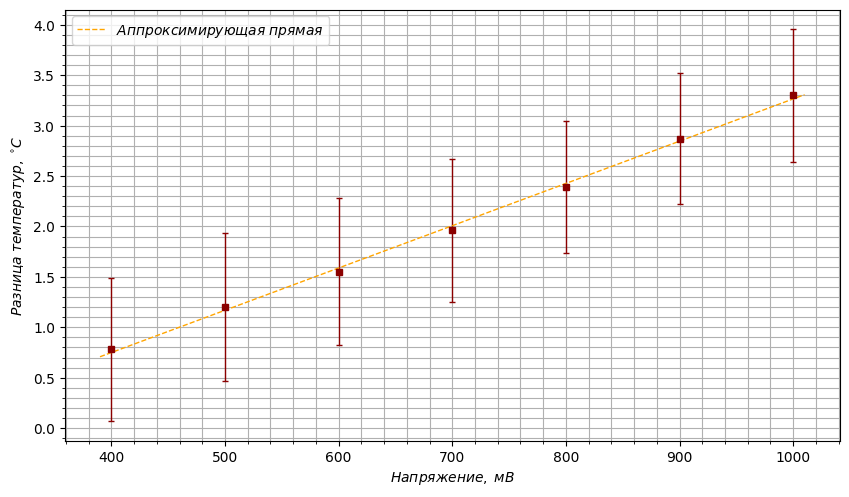

In [44]:

tabelOfAmp = pd.DataFrame()
exp_time = 140
for i in range(400, 1100, 100):
    filename = f'tests/amplitude/test_a_{i}.csv'
    if os.path.exists(filename):
        safe_read(filename)
        df = pd.read_csv(filename, sep=', ')
        df = df.dropna()
        s = find_a_start(df)
        f = s + exp_time * 1000
        df = df[(s <= df['t']) & (df['t'] <= f)]
        t, Th, Tc = df['t'], df['Th'], df['Tc']
        DeltaT = Th - Tc
        dT = abs(0.9 * DeltaT.iloc[0])
        temp = {'dt': (df.iloc[-1, 0] - df.iloc[0, 0]) / 1000, 'Vpp': i,
                'DeltaT': DeltaT.iloc[-1] - DeltaT.iloc[0], 'dT': dT}
        tabelOfAmp = tabelOfAmp.append(temp, ignore_index=True)


def f(x, a, b):
    return a * x + b


popt, pcov = curve_fit(f, tabelOfAmp['Vpp'], tabelOfAmp['DeltaT'])
# f = spline(tabelOfRegen['x'], tabelOfRegen['DeltaT'])
x = np.linspace(tabelOfAmp['Vpp'].min()-10, tabelOfAmp['Vpp'].max()+10, 300)

y = f(x, *popt)


fig, ax = plt.subplots(figsize=(10, 5.6))
ax.errorbar(tabelOfAmp['Vpp'], tabelOfAmp['DeltaT'], tabelOfAmp['dT'], 0, ls='', marker='s', ms=4,
            c='darkred', lw=1, capsize=2)
ax.plot(x, y, ls='--', lw=1, c='orange', label=r'$Аппроксимирующая\;прямая$')
ax.set_ylabel(r'$Разница\;температур,\;^{\circ}C$')
ax.set_xlabel(r'$Напряжение,\;мВ$')
ax.grid(which='both')
ax.minorticks_on()
ax.legend()
tabelOfAmp